## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_russia = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_russia.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Russia


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


### Random Slice of Data
<hr>

In [3]:
df_russia.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
8323,russia,04/19/1994,57.5,36.6,46.5,24.6,NaN,0.00,NaN,28.9,NaN,6.2,72.0,76.08,Partially cloudy
3306,russia,07/24/1980,85.8,64.5,76.3,NaN,86.1,0.00,NaN,10.2,NaN,3.9,59.1,70.54,Partially cloudy
16984,russia,01/04/2018,39.4,31.4,34.5,23.2,NaN,0.00,NaN,14.2,24.6,6.2,79.5,80.71,Overcast
6937,russia,07/03/1990,69.5,59.1,64.8,NaN,NaN,0.00,NaN,6.9,NaN,3.2,68.7,88.08,Partially cloudy
15130,russia,12/07/2012,25.5,20.5,22.8,9.7,NaN,0.03,5.12,13.5,NaN,5.6,98.8,89.98,"Snow, Overcast"


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [4]:
df_russia.shape

(18019, 15)

In [5]:
#printing missing data sum
df_russia.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              4957
Heat Index             17141
Precipitation              0
Snow Depth             12669
Wind Speed                 0
Wind Gust              17186
Visibility                34
Cloud Cover                2
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

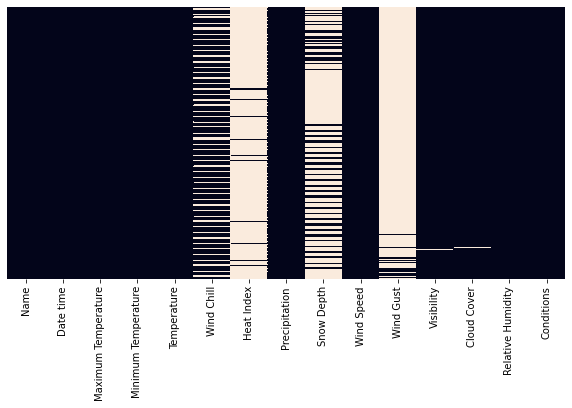

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df_russia.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [7]:
df_russia.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [8]:
df_russia.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18014,russia,10/30/2020,42.1,36.0,39.6,0.0,6.7,6.2,73.0,81.37,Partially cloudy
18015,russia,10/31/2020,46.4,39.8,43.0,0.0,10.4,5.9,94.4,83.85,Overcast
18016,russia,11/01/2020,44.0,39.1,41.4,0.0,15.9,5.7,93.4,86.20,Overcast
18017,russia,11/02/2020,43.9,39.1,41.7,0.0,11.1,3.0,99.8,97.14,Overcast
18018,russia,11/03/2020,46.3,42.0,43.9,0.0,9.6,3.4,98.0,95.67,Overcast


In [9]:
#Mean Imputing for visibility
df_russia['Visibility'].fillna(df_russia['Visibility'].mean(), inplace = True)
df_russia['Cloud Cover'].fillna(df_russia['Cloud Cover'].mean(), inplace = True)
print(df_russia.isnull().sum())

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [10]:
#minimum value for temperature
df_russia['Temperature'].min()

-32.2

In [11]:
#maximum value for temperature
df_russia['Temperature'].max()

86.4

In [12]:
#minimim value for temperature
df_russia['Precipitation'].min()

0.0

In [13]:
#maximum value for precipitation
df_russia['Precipitation'].max()

37.92

In [14]:
#ToDO - Update feature details

In [15]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [16]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_russia.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_russia['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [17]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.0,13.9,6.2,48.3,84.54
1,0.0,18.3,3.1,87.5,89.14
2,0.0,18.3,3.7,92.5,91.09
3,0.0,16.1,3.7,97.5,89.49
4,0.0,16.1,2.7,100.0,92.43


In [18]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [19]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_russia.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_russia['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [20]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

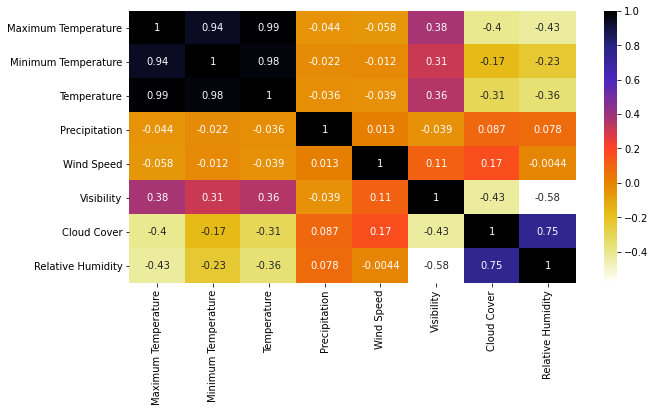

In [21]:
plt.figure(figsize=(10,5))
c= df_russia.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is slightly correlated with Visibility and has a slight negative correlation with Relative Humidity, Cloud Cover and other two features

For `Precipitation`, It is not not correlated with feature and these are negligible values

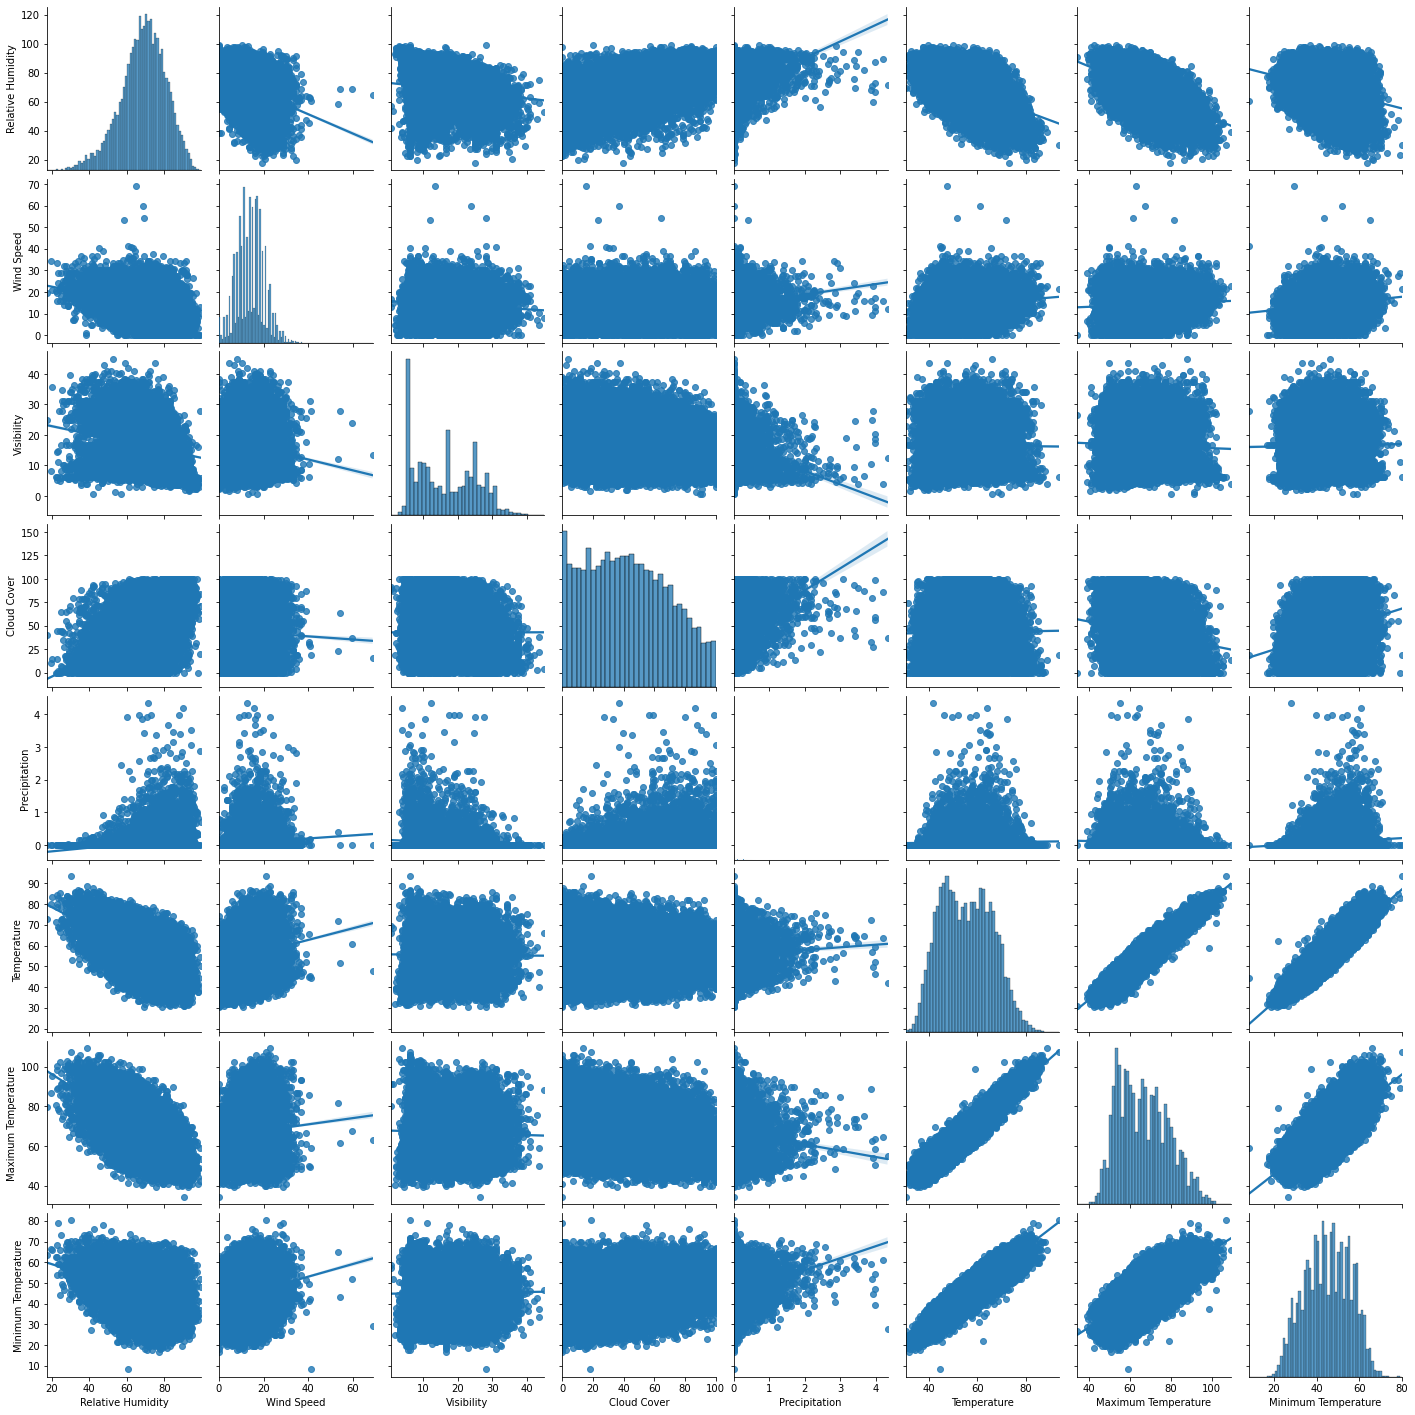

In [23]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_russia[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship.With respect to other features there is no obvious linear relation

For Precipitation, we can see majority of values are not correlated in any way. It lies in the range of 0-1 for many feature values.There is no obvious relation between any features and precipitation. 

#### 3.3 Using Feature Transformation for conditions

In [22]:
df_russia['Conditions'] = df_russia['Conditions'].astype('category')

In [23]:
df_russia_conditions = pd.get_dummies(df_russia['Conditions'])

In [24]:
df_russia  = pd.concat([df_russia,df_russia_conditions],axis=1)

In [25]:
df_russia.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy,0,0,1,0,0,0,0,0,0
1,russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast,0,1,0,0,0,0,0,0,0
2,russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast,0,1,0,0,0,0,0,0,0
3,russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast,0,1,0,0,0,0,0,0,0
4,russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast,0,1,0,0,0,0,0,0,0


In [26]:
df_russia.to_csv("russia_cleaned.csv")

## Regression

(array([   8.,   63.,  382., 1161., 2389., 4324., 2926., 3843., 2695.,
         228.]),
 array([-32.2 , -20.34,  -8.48,   3.38,  15.24,  27.1 ,  38.96,  50.82,
         62.68,  74.54,  86.4 ]),
 <BarContainer object of 10 artists>)

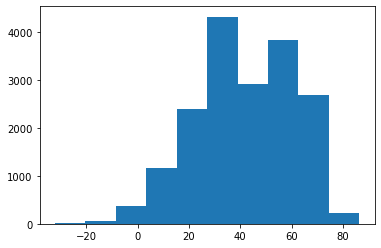

In [27]:
plt.hist(df_russia['Temperature'])

(array([1.7737e+04, 1.1200e+02, 1.0300e+02, 2.8000e+01, 1.4000e+01,
        1.0000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.   ,  3.792,  7.584, 11.376, 15.168, 18.96 , 22.752, 26.544,
        30.336, 34.128, 37.92 ]),
 <BarContainer object of 10 artists>)

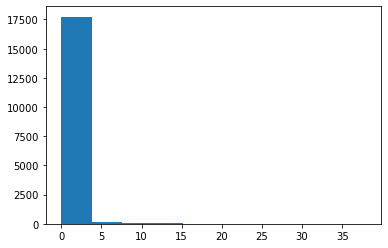

In [28]:
plt.hist(df_russia['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [29]:
#Considering Visibilty, Cloud Cover and Humidity
X_temp=df_russia.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time','Wind Speed'],axis=1)
Y_temp=df_russia.Temperature

#### Importing the train test split function for Temperature

In [30]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp,test_size=0.4)

In [31]:
train_X_temp.head()

,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
10500,3.8,82.2,92.48,0,0,0,0,0,0,0,1,0
8395,6.3,28.0,62.40,0,0,1,0,0,0,0,0,0
6891,5.9,68.4,83.61,0,0,1,0,0,0,0,0,0
13029,6.0,53.9,77.32,0,0,0,0,0,0,0,0,1
457,4.0,71.4,77.58,0,0,1,0,0,0,0,0,0


In [32]:
train_y_temp.head()

10500    36.1
8395     63.8
6891     52.5
13029    37.2
457      42.3
Name: Temperature, dtype: float64

In [33]:
#getting the shape for training data
train_X_temp.shape

(10811, 12)

In [34]:
train_y_temp.shape

(10811,)

In [35]:
#getting the shape for test data
test_X_temp.shape

(7208, 12)

### 1. Implementing Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score 
import math

In [37]:
lr = LR(normalize=True)
kfold = KFold(n_splits=10)#using KFold cross validation
mse_scores = -np.round(cross_val_score(lr,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[13.892443989449804, 14.106735979665885, 14.560219778561036, 14.7648230602334, 13.892443989449804, 13.892443989449804, 14.317821063276353, 14.730919862656235, 14.38749456993816, 14.177446878757825]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.272279316143829


Text(0, 0.5, 'Root Mean Square Error')

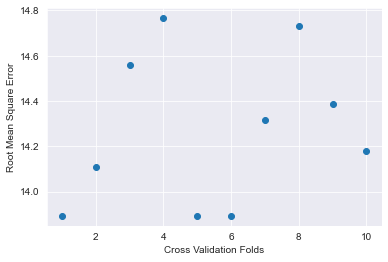

In [38]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [39]:
# Predicting over the Train Set and calculating error
lr.fit(train_X_temp,train_y_temp)
train_predict = lr.predict(train_X_temp)
linear_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 14.257642057665565


In [40]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
linear_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )
linear_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Linear regression',linear_r2_score)

Test Root Mean Squared Error 14.217284004444286
R2 Square Error for Linear regression 0.43741675944874736


### Knn Algorithm

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
x_scaled= MinMaxScaler()
train_X_temp[['Cloud Cover','Relative Humidity','Visibility']] = x_scaled.fit_transform(train_X_temp[['Cloud Cover','Relative Humidity','Visibility']])

x_test_scaled= MinMaxScaler()
test_X_temp[['Cloud Cover','Relative Humidity','Visibility']]=x_test_scaled.fit_transform(test_X_temp[['Cloud Cover','Relative Humidity','Visibility']])

In [43]:
from sklearn import neighbors
n_neighbors=19 #came up with 18 after hyper-paramter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,leaf_size=2,n_jobs=-1,algorithm='brute')
mse_scores = -np.round(cross_val_score(knn,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[13.711309200802088, 14.106735979665885, 14.628738838327793, 14.38749456993816, 13.784048752090222, 13.711309200802088, 13.96424004376894, 14.45683229480096, 14.071247279470288, 13.96424004376894]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.078619620343536


Text(0, 0.5, 'Root Mean Square Error')

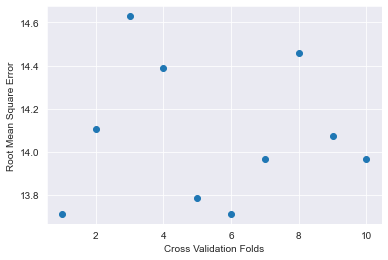

In [44]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [45]:
# Predicting over the Train Set and calculating error
knn.fit(train_X_temp,train_y_temp)
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 13.364101819929585


In [46]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 14.30183386708346
R2 Square Error for KNN regression 0.43070552351200975


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

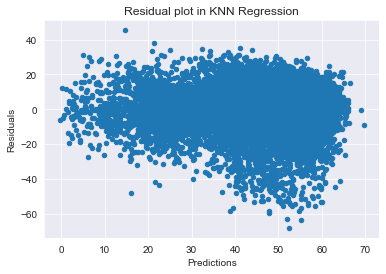

In [47]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [48]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
xgb = XGBRegressor()
mse_scores = -np.round(cross_val_score(xgb,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[14:08:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

Text(0, 0.5, 'Root Mean Square Error')

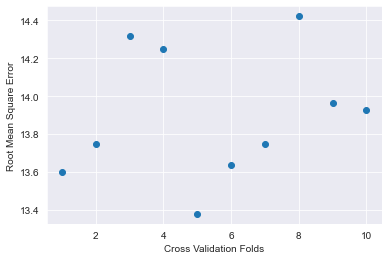

In [49]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [50]:
# Predicting over the Train Set and calculating error
xgb.fit(train_X_temp,train_y_temp)
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

[14:08:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Root Mean Squared Error 13.62312247349634


In [51]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 13.954975888668857
R2 Square Error for Gradient Boosting regression 0.4579845161504821


### Residual plot in Gradient Boosting

Text(0.5, 1.0, 'Residual plot in Random Forest Regression')

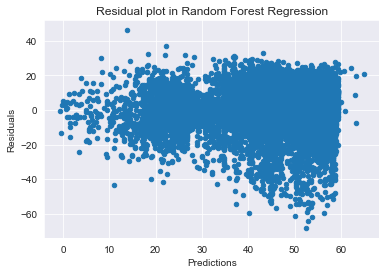

In [53]:
preds = pd.DataFrame({"preds":xgb.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Random Forest Regression")

### Decision Tree Regressor

In [54]:
from sklearn import tree
#Paraemeters passed here are tuned using Hyper-parameter tuning
dec = tree.DecisionTreeRegressor(max_features="auto",min_samples_leaf=7,min_samples_split=11,max_depth=8)
mse_scores = -np.round(cross_val_score(dec,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[13.784048752090222, 14.106735979665885, 14.491376746189438, 14.38749456993816, 13.638181696985855, 13.92838827718412, 13.820274961085254, 14.45683229480096, 14.142135623730951, 14.035668847618199]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.079113774928905


Text(0, 0.5, 'Root Mean Square Error')

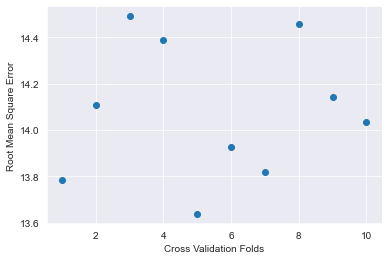

In [55]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [56]:
# Predicting over the Train Set and calculating error
dec.fit(train_X_temp,train_y_temp)
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 13.557632907049598


In [57]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 14.142523547113536
R2 Square Error for Decision Tree regression 0.4433178019313151


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

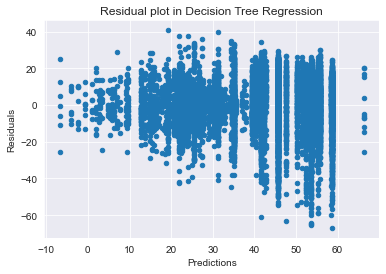

In [58]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

###  Support Vector Regression for Temperature

#### Pre processing features

In [59]:
from sklearn.svm import SVR

model1=SVR(kernel="rbf",C=12) #Came up with parameters after parameter tuning
mse_scores = -np.round(cross_val_score(model1,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[13.784048752090222, 14.247806848775006, 15.0, 14.730919862656235, 14.035668847618199, 13.820274961085254, 14.035668847618199, 14.866068747318506, 14.45683229480096, 14.035668847618199]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:14.301295800958078


Text(0, 0.5, 'Root Mean Square Error')

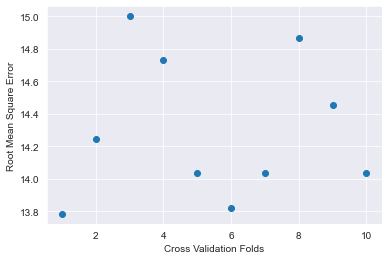

In [60]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [61]:
# Predicting over the Train Set and calculating error
model1.fit(train_X_temp,train_y_temp)
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 14.261113016117614


In [62]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 14.384458845297587
R2 Square Error for SVM regression 0.42410863269975774


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

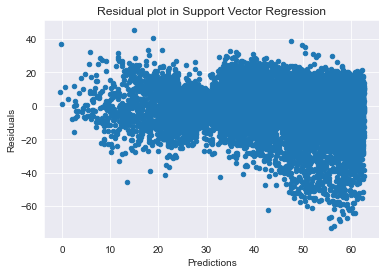

In [63]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [64]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost Regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,14.257642,14.217284
K-Nearest,13.364102,14.301834
XGBoost Regressor,13.623122,13.954976
Decision Tree,13.557633,14.142524
SVM,14.261113,14.384459


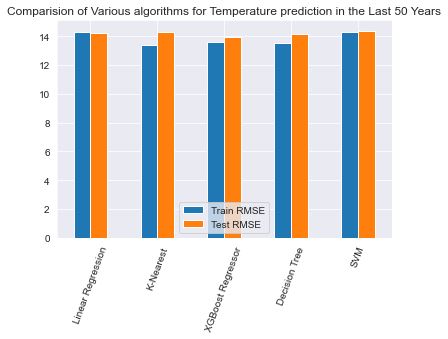

In [65]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [66]:
test_r2_square_error=[linear_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square
Ridge Regression,0.437417
K-Nearest,0.430706
Gradent Boost,0.457985
Decision Tree,0.443318
SVM,0.424109


Text(0.5, 1.0, 'R2 Square for Various Models')

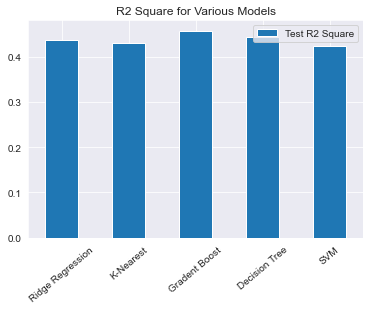

In [67]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [68]:
# Considering only cloud cover and relative Humidity
X_prec=df_russia.drop(columns=['Precipitation','Name','Date time','Maximum Temperature','Minimum Temperature','Temperature','Visibility',
                           'Wind Speed','Conditions'],axis=1)
Y_prec=df_russia.Precipitation

In [69]:
X_prec.head()

,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,48.3,84.54,0,0,1,0,0,0,0,0,0
1,87.5,89.14,0,1,0,0,0,0,0,0,0
2,92.5,91.09,0,1,0,0,0,0,0,0,0
3,97.5,89.49,0,1,0,0,0,0,0,0,0
4,100.0,92.43,0,1,0,0,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [89]:
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec,test_size=0.4)

### Multi Linear Regression

In [90]:
lr = LR(normalize=True)
lr.fit(train_X_prec,train_y_prec)
y_predict=lr.predict(test_X_prec)

In [91]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_prec)
linear_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 1.3637228043372216


In [92]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_prec)
linear_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )

Test Root Mean Squared Error 1.4531920194032746


### Knn Algorithm

In [93]:
#Preprocessing features
x_scaled=StandardScaler()
train_X_prec[['Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Cloud Cover','Relative Humidity']])

In [94]:
n_neighbors=10 #came up with 10 after hyper-paremter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [95]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 1.2956516447821802


In [96]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 1.4922318056031771


### Decision Tree Regressor

In [97]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [98]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 1.3774446516604475


In [99]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )

Test Root Mean Squared Error 1.4686460773421393


### Gradient Boosting Regressor

In [100]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[14:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [101]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 1.229710579734976


In [102]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 1.5009572896058254


### Support Vector Regression for Precipitation

In [103]:
model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [104]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 1.3873165416034885


In [105]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )

Test Root Mean Squared Error 1.4782290213527838


### Getting the Graph for all Models RMSE

In [106]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,1.363723,1.453192
K-Nearest,1.295652,1.492232
XGBoost regressor,1.229711,1.500957
Decision Tree,1.377445,1.468646
SVM,1.387317,1.478229


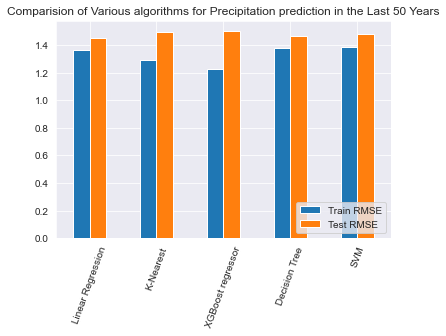

In [107]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.legend(loc='lower right')
plt.show()